In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
print("Reading The Data")

ipl_df=pd.read_csv('matches.csv')
ipl_df

Reading The Data


id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
751               Mumbai Indians               Mumbai Indians         field   
752               Mumbai Indians          Chennai Super Kings           bat   
753               Delhi Capitals               Delhi Capitals         field   
754          Chennai Super Kings          Chennai Super Kings         field   
755          Chennai Super Kings               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
751  normal           0               Mumbai Indians            0   
752  normal           0               Mumbai Indians            0   
753  normal           0               Delhi Capitals            0   
754  normal           0          Chennai Super Kings            0   
755  normal           0               Mumbai Indians            1   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
751               9       HH Pandya   
752               6        AS Yadav   
753               2         RR Pant   
754               6    F du Plessis   
755               0       JJ Bumrah   

                                         venue         umpire1  \
0    Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1      Maharashtra Cricket Association Stadium  A Nand Kishore   
2       Saurashtra Cricket Association Stadium     Nitin Menon   
3                       Holkar Cricket Stadium    AK Chaudhary   
4                        M Chinnaswamy Stadium             NaN   
..                                         ...             ...   
751                           Wankhede Stadium   Nanda Kishore   
752                  M. A. Chidambaram Stadium     Nigel Llong   
753                           ACA-VDCA Stadium             NaN   
754                           ACA-VDCA Stadium   Sundaram Ravi   
755         Rajiv Gandhi Intl. Cricket Stadium     Nitin Menon   

            umpire2            

Cleaning the data

In [5]:
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [6]:
ipl_df['city'].fillna('Abu Dhabi',inplace=True)
ipl_df['winner'].fillna('Draw', inplace = True)

In [8]:
#Both Rising Pue Supergiant and Rising Pune Supergiants represents same team similarly Delhi Capitals and Delhi Daredevils,
#Deccan Chargers and Sunrisers Hyderabad

ipl_df.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
ipl_df.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
ipl_df.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
ipl_df.replace("Pune Warriors","Rising Pune Supergiants", inplace=True)

In [9]:
print(ipl_df.info())
ipl_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB
None


id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [10]:
ipl_df.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL"}, inplace=True)


numeric = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11, 'Draw':13}}


ipl_df.replace(numeric, inplace=True)
ipl_df.head(5)

id  season       city        date  team1  team2  toss_winner toss_decision  \
0   1    2017  Hyderabad  2017-04-05      5      7            7         field   
1   2    2017       Pune  2017-04-06      4     10           10         field   
2   3    2017     Rajkot  2017-04-07     11      1            1         field   
3   4    2017     Indore  2017-04-08     10      6            6         field   
4   5    2017  Bangalore  2017-04-08      7      8            7           bat   

   result  dl_applied  winner  win_by_runs  win_by_wickets player_of_match  \
0  normal           0       5           35               0    Yuvraj Singh   
1  normal           0      10            0               7       SPD Smith   
2  normal           0       1            0              10         CA Lynn   
3  normal           0       6            0               6      GJ Maxwell   
4  normal           0       7           15               0       KM Jadhav   

                                       venue  
0  Rajiv Gandhi International Stadium, Uppal  
1    Maharashtra Cricket Association Stadium  
2     Saurashtra Cricket Association Stadium  
3                     Holkar Cricket Stadium  
4                      M Chinnaswamy Stadium

In [11]:
mipl_df = ipl_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]

mipl_df.head(5)

team1  team2       city toss_decision  toss_winner  \
0      5      7  Hyderabad         field            7   
1      4     10       Pune         field           10   
2     11      1     Rajkot         field            1   
3     10      6     Indore         field            6   
4      7      8  Bangalore           bat            7   

                                       venue  winner  
0  Rajiv Gandhi International Stadium, Uppal       5  
1    Maharashtra Cricket Association Stadium      10  
2     Saurashtra Cricket Association Stadium       1  
3                     Holkar Cricket Stadium       6  
4                      M Chinnaswamy Stadium       7

In [12]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(mipl_df)
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


df

team1  team2  city  toss_decision  toss_winner  venue  winner
0        5      7    14              1            7     28       5
1        4     10    26              1           10     21      10
2       11      1    28              1            1     31       1
3       10      6    15              1            6     13       6
4        7      8     2              0            7     17       7
..     ...    ...   ...            ...          ...    ...     ...
751      1      4    23              1            4     40       4
752      2      4     8              0            2     18       4
753      5      8    31              1            8      0       8
754      8      2    31              1            2      0       2
755      4      2    14              0            4     29       4

[756 rows x 7 columns]

1. Try Clustering

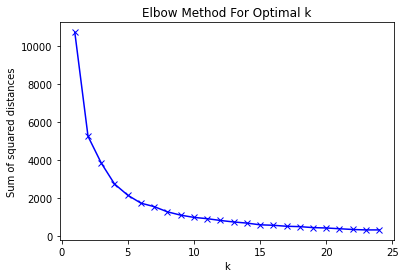

Distortion:  5250.418596186691
Average of square root:  2.6353364383137285
Centroids: 
 [[2.93048128 2.86363636]
 [6.78272251 6.62827225]]
Assignments:  [1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 0 0 0

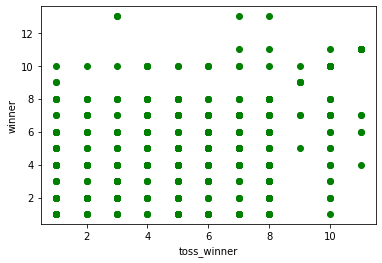

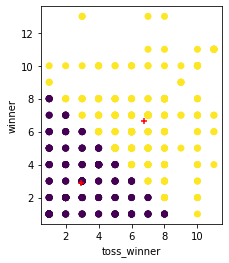

In [13]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math


df['a'] = df['team1'].astype(int)
df['b'] = df['team2'].astype(int)
df['c'] = df['city'].astype(int)
df['d'] = df['toss_decision'].astype(int)
df['e'] = df['toss_winner'].astype(int)
df['f'] = df['venue'].astype(int)
df['g'] = df['winner'].astype(int)

X = df[['e','g']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)


sosqud = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sosqud.append(km.inertia_)

plt.plot(K, sosqud, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Distortion: ", kmeans.inertia_)
RMSavrg = math.sqrt(kmeans.inertia_ / len(X))

print("Average of square root: ", RMSavrg)
print("Centroids: \n", kmeans.cluster_centers_)
print("Assignments: ", kmeans.labels_)


plt.scatter(df['e'], df['g'], color="green")
plt.xlabel("toss_winner")
plt.ylabel("winner")
plt.show()


cluster_x = [x for [x,y] in kmeans.cluster_centers_]
cluster_y = [y for [x,y] in kmeans.cluster_centers_]


plt.scatter(df['e'], df['g'], c=kmeans.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("toss_winner")
plt.ylabel("winner")
plt.axis("scaled")
plt.show()

2) Do dimensional analysis

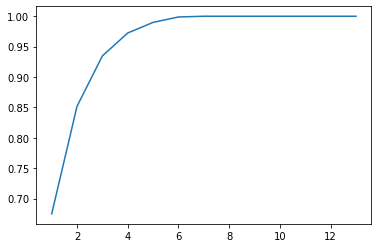

In [14]:
from sklearn.decomposition import PCA
import numpy as np
X_train =  df.drop(['city'], axis = 1)

y_train = df['city']
pca = PCA()
pca.fit(X_train)
sums = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
valt = [i+1 for i in range(0,len(sums))]
plt.plot(valt, sums)
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

MNIST_model = SVC(random_state = 123, max_iter=1200, tol=0.25)

hit = Pipeline([
    ('svc', MNIST_model)
])

print(hit)
X_train =  df.drop(['city'], axis = 1)
y_train = df['city']

hit.fit(X_train, y_train)

Pipeline(steps=[('svc', SVC(max_iter=1200, random_state=123, tol=0.25))])


Pipeline(steps=[('svc', SVC(max_iter=1200, random_state=123, tol=0.25))])

3) Visualize and create a narrative about what you have discovered in the data. Don't just be descriptive, think predictively.

In [16]:
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()


#Now we'll sort this data in more organised manner by renaming it's column's names.
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decision_df.style.hide_index()

C:\Users\S545262\AppData\Local\Temp\ipykernel_4860\157354543.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  decision_df.style.hide_index()


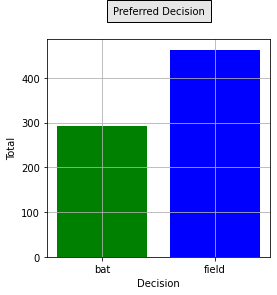

In [17]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



plt.figure(figsize=(4,4))
plt.title("Preferred Decision",fontsize=10,bbox={'facecolor':'0.9','pad':6},pad=25)
plt.xlabel('Decision',fontsize=10)
plt.ylabel('Total',fontsize=10)
#to set the tick parameters
plt.tick_params(labelsize=10)
plt.grid()
plt.bar(decision_df.Decision, decision_df.Total, color=['green','blue']);

In [19]:
print('The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been to chase the score')

The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been to chase the score


In [18]:
field_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'field'), ['id', 'winner','toss_decision']]
field_df.id.count()

bat_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['id', 'winner','toss_decision']]
bat_df.id.count()

134

In [20]:
dataframes = [bat_df, field_df]

result_df = pd.concat(dataframes)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df

id
toss_decision     
bat            134
field          259

In [21]:

result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)

result_df.style.hide_index()

C:\Users\S545262\AppData\Local\Temp\ipykernel_4860\1373996989.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  result_df.style.hide_index()


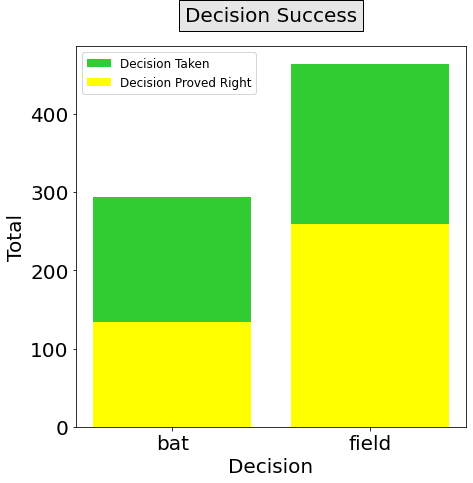

In [22]:
plt.figure(figsize=(7,7))
plt.title("Decision Success",fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25)
plt.xlabel('Decision',fontsize=20)
plt.ylabel('Total',fontsize=20)
# to set the ticks size
plt.tick_params(labelsize=20)
plt.bar(decision_df.Decision, decision_df.Total, color=['limegreen','limegreen']);
plt.bar(result_df.Decision, result_df.Total, color=['yellow','yellow']);
plt.legend(['Decision Taken','Decision Proved Right'],fontsize='larger');

In [23]:
print('45% of times taking decision to bat first was successful and 55% times choosing to feild first has been prooved to be successfull.')

45% of times taking decision to bat first was successful and 55% times choosing to feild first has been prooved to be successfull.


4) Is there anomalous data? What does it mean?

No, In my dataset there is no anomalous data. Anomalous data means data which has suspicious patterns and differ significantly from standard behaviors

5) Explore more advanced regression/classifier tools. (Random Forrest is interesting, Neural Nets are king.)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df[['team1', 'team2', 'venue']]
Y = df[['winner']]

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=113)
scaler = StandardScaler()
scaler.fit(X_train)
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalert = StandardScaler()
scalert.fit(X_test)
transformt = scalert.transform(X_test)
scalar_test = pd.DataFrame(transformt)

rf=RandomForestClassifier(n_estimators=200)
rf.fit(scalar_train,y_train)

y_pred=rf.predict(scalar_test)
rf.fit(scalar_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\S545262\AppData\Local\Temp\ipykernel_4860\628027737.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(scalar_train,y_train)
C:\Users\S545262\AppData\Local\Temp\ipykernel_4860\628027737.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(scalar_train,y_train)


Accuracy: 0.5066079295154186


In [31]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

X = df[['team1', 'team2', 'venue']]
Y = df[['winner']]
RClassifier = RandomForestClassifier()
RClassifier.fit(X,Y)

from sklearn.metrics import confusion_matrix
y_predicted = RClassifier.predict(X)
print("Confusion matrix")
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))

C:\Users\S545262\AppData\Local\Temp\ipykernel_4860\3952863928.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RClassifier.fit(X,Y)


Confusion matrix
[[78  2  4  4  0  2  2  0  0  0  0  0]
 [ 1 92  1  5  0  0  0  0  0  1  0  0]
 [ 0  1 68  0  0  1  0  5  0  0  0  0]
 [ 0  0  6 92  4  2  0  3  0  2  0  0]
 [ 4  3  3  2 64  3  3  4  0  1  0  0]
 [ 3  2  1  4  4 60  7  1  0  0  0  0]
 [ 4  4  5  5  2  0 64  0  0  0  0  0]
 [ 5  4  0  3  1  3  5 55  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0]
 [ 1  0  0  0  0  1  1  1  0 23  0  0]
 [ 0  0  0  0  0  0  2  1  0  0 10  0]
 [ 0  0  1  0  0  0  1  1  0  0  0  1]]
Accuracy is  0.8108465608465608
F1 is  0.808871484629649
